## 1.starbucks 거리 구하기

In [1]:
import pandas as pd

In [2]:
sb_data = pd.read_csv("starbucks_seoul.csv")
sb_data.head(100)

,Unnamed: 0,Store Number,Store Name,Street Address,Longitude,Latitude
0,7982,19176-199455,Wolgae Emart,"333-1 Wolgae3dong, Nowongu, Seoul",127.06,37.63
1,7983,23428-230106,Olympic Park North Gate,"468 Seongnae-dong,Gangdong-gu",127.13,37.53
2,7984,49283-267704,Mia Newtown,"812-2, Mia-dong, Gangbuk-gu",127.02,37.62
3,7985,21320-211245,Yangjae Station,"14-4 Yangjae-dong, Seocho-gu",127.04,37.48
4,7986,15565-163169,Apgujeong Center,"639-7, Shinsa-Dong, Gangnam-Gu, Yonsei Foundat...",127.04,37.53
...,...,...,...,...,...,...
95,8082,48547-263608,Apgujeong,"609 sinsadong, gangnamgu",127.03,37.53
96,8083,25341-240585,Yaksu Station,"374-27, Sindang-dong, Jung-gu,",127.01,37.56
97,8084,48732-264885,mapo yeomri,"168-9 Yeomri-dong, Mapo-gu, Garden 5 Tool Pavi...",126.95,37.54
98,8085,15987-167305,Garden 5 E-Mart,"280 Munjung-Dong, Songpa-Gu, B1F",127.12,37.48


In [3]:
from haversine import haversine

# 출처: https://stricky.tistory.com/284 [The DataBase that i am good at]

In [4]:
# 위경도 입력 
data1 = (127.06, 37.63) #Latitude, Longitude 
data2 = (127.13, 37.53) 

# 거리 계산 

haversine(data1, data2, unit = 'km')

#출처: https://stricky.tistory.com/284 [The DataBase that i am good at]

10.274422812902493

## 아파트 근처 외부시설 유무 확인

In [5]:
apt_data = pd.read_csv("gwangjin.csv")
apt_data.drop(["Unnamed: 0"], axis=1, inplace=True)


In [6]:
# 아파트 위치 위도, 경도 계산

apt_data[["apt", "latitude", "longitude"]]



,apt,latitude,longitude
0,중곡2단지,37.566785,127.078428
1,에스케이,37.568871,127.086509
2,중곡1단지,37.566399,127.078881
3,성원,37.571190,127.079631
4,에스케이,37.568871,127.086509
...,...,...,...
2057,일성파크,37.551274,127.072640
2058,동양파라곤,37.548573,127.070232
2059,일성파크,37.551274,127.072640
2060,일성파크,37.551274,127.072640


In [7]:
# 외부 요인들 위도, 경도 계산

sb_data[["Store Name", "Latitude", "Longitude"]]

,Store Name,Latitude,Longitude
0,Wolgae Emart,37.63,127.06
1,Olympic Park North Gate,37.53,127.13
2,Mia Newtown,37.62,127.02
3,Yangjae Station,37.48,127.04
4,Apgujeong Center,37.53,127.04
...,...,...,...
238,Hapjung Xi,37.55,126.91
239,Seocho Jungangro,37.50,127.01
240,Seogang,37.55,126.93
241,Kkachisan-station,37.53,126.85


In [8]:
#### 첫 번째 아파트와 스벅 매장들과의 거리


distance_list=[]
# 첫번째 아파트
data1 = (apt_data["latitude"][0], apt_data["longitude"][0]) 

# 스벅 모든 매장
j = 0
for j in range(0, len(sb_data)):
    data2 = (sb_data["Latitude"][j], sb_data["Longitude"][j]) 
    
    #아파트 한곳이랑 스벅 전체 매장의 거리
    distance = haversine(data1, data2, unit = 'm')
    
    distance_list.append(distance)

distance_list
    
# 0번 아파트와 200개 스벅 매장 중 가장 가까운 거리 찾기 + 첫번째 로우의 셀 자료가 될 것
# distance는 소수점 1자리까지 반올림해서 정리

distance_0 = round(min(distance_list), 1)
distance_0

# 아파트당 최단거리 데이터가 모이면 그 데이터가 모여 "거리" 컬럼이 된다.

apt_data



,gu,dong,apt,addr,area,completion,transaction_ym,floor,price,price/pyeong,latitude,longitude
0,광진구,중곡동,중곡2단지,중곡동 190-26 중곡2단지,55.87,1976,201701,1,25000,1477,37.566785,127.078428
1,광진구,중곡동,에스케이,중곡동 292 에스케이,84.60,1999,201701,17,45500,1775,37.568871,127.086509
2,광진구,중곡동,중곡1단지,중곡동 191-77 중곡1단지,48.46,1976,201701,5,19000,1294,37.566399,127.078881
3,광진구,중곡동,성원,중곡동 681 성원,59.82,1998,201701,14,29600,1633,37.571190,127.079631
4,광진구,중곡동,에스케이,중곡동 292 에스케이,84.60,1999,201701,15,43300,1689,37.568871,127.086509
...,...,...,...,...,...,...,...,...,...,...,...,...
2057,광진구,군자동,일성파크,군자동 99 일성파크,84.96,1996,201710,19,49500,1923,37.551274,127.072640
2058,광진구,군자동,동양파라곤,군자동 360-20 동양파라곤,124.65,2008,201710,8,65400,1731,37.548573,127.070232
2059,광진구,군자동,일성파크,군자동 99 일성파크,59.96,1996,201711,6,39500,2174,37.551274,127.072640
2060,광진구,군자동,일성파크,군자동 99 일성파크,59.96,1996,201711,7,39900,2196,37.551274,127.072640


In [9]:
ap_data = apt_data[["apt"]].drop_duplicates(keep='first') # 중복되는 아파트 제거
ap_data = ap_data.reset_index(drop=True) # index 값 재정렬 
ap_data 

,apt
0,중곡2단지
1,에스케이
2,중곡1단지
3,성원
4,욱현하이브Ⅲ
...,...
115,일성파크
116,호동
117,동양파라곤
118,동양파라곤(2)


In [10]:
len(ap_data)

120

In [11]:
# 각 아파트와 스벅 매장간 거리 계산 for문 만들기

distance_list=[]

i = 0
j = 0

for i in range(0, len(ap_data)):
    
    for j in range(0, len(sb_data)):
        data1 = (apt_data["latitude"][i], apt_data["longitude"][i]) 
        data2 = (sb_data["Latitude"][j], sb_data["Longitude"][j]) 
       
        distance = haversine(data1, data2, unit = 'm')
        
        distance_list.append(distance)

distance_list

[7214.292580224153,
 6115.694165308926,
 7843.149168194749,
 10227.792821384475,
 5311.067381846039,
 11324.78181873478,
 9291.82271236099,
 7428.685305335342,
 19484.234698234806,
 14553.571838645106,
 14879.531505325305,
 12979.611661708901,
 7321.156257095999,
 6730.024221318287,
 14864.733096508922,
 5434.981783582003,
 13086.743449688467,
 3049.757818937767,
 16253.25444693536,
 8682.4179329055,
 16671.078030256274,
 54579.3275619987,
 14039.398557010292,
 7801.8888148767755,
 49769.30329147615,
 19983.63196923824,
 8682.4179329055,
 14089.256937559288,
 3148.1773250421547,
 8708.374851271452,
 5774.507171670789,
 8682.4179329055,
 10883.44631791335,
 7066.349628896001,
 25646.43953809914,
 29771.137027574216,
 7930.502774188683,
 7288.511809665525,
 8682.4179329055,
 7321.156257095999,
 2981.538353835515,
 10767.8194263707,
 39163.97756908086,
 nan,
 8566.346410395981,
 6519.873553914801,
 10011.603036756249,
 19064.549172087853,
 55652.85953999875,
 8682.4179329055,
 6559.470380

In [12]:
len(distance_list) # 전체 데이터 개수 확인

29160

In [13]:
a = 243 * 39 # 행과 열 개수 곱하여서 함수로 구한 데이터와 개수가 맞는지 확인(개수가 맞아야 array로 변경 가능)
a

9477

In [14]:
distance_data = np.reshape(distance_list, (len(ap_data),len(sb_data))) # list > array로 변환 
distance_data = np.sort(distance_data, axis=1) # 구역마다 오름차순 정렬
distance_data

array([[ 1058.75881949,  1788.71200277,  2126.9307184 , ...,
        56974.51741456, 66606.15703244,            nan],
       [ 1275.13061119,  1757.9568036 ,  2120.8398654 , ...,
        57707.80914059, 66062.30812521,            nan],
       [ 1057.85328559,  1802.0936848 ,  2070.14367884, ...,
        56987.80204802, 66551.71988965,            nan],
       ...,
       [  356.38305195,   732.35916585,  1554.06748315, ...,
        56932.30022469, 63723.11241891,            nan],
       [  393.36207806,   540.78006066,  1366.42966998, ...,
        56854.76158408, 63918.57035859,            nan],
       [  356.38305195,   732.35916585,  1554.06748315, ...,
        56932.30022469, 63723.11241891,            nan]])

In [15]:
df = pd.DataFrame(distance_data)
df

,0,1,2,3,4,5,6,7,8,9,...,233,234,235,236,237,238,239,240,241,242
0,1058.758819,1788.712003,2126.930718,2981.538354,2981.538354,3049.757819,3069.583414,3148.177325,3470.112169,3533.651209,...,49769.303291,53565.857489,54579.327562,54935.545078,55453.547420,55652.859540,56272.606510,56974.517415,66606.157032,NaN
1,1275.130611,1757.956804,2120.839865,3225.063508,3261.218247,3261.218247,3313.128859,3423.551106,3475.001414,3475.001414,...,50497.235252,54068.582087,54300.778634,54449.047467,55791.000785,56184.310524,56387.531649,57707.809141,66062.308125,NaN
2,1057.853286,1802.093685,2070.143679,2937.049979,2937.049979,3038.015231,3094.707993,3107.394906,3475.974896,3500.180153,...,49780.703377,53579.767468,54523.658171,54879.128772,55465.913435,55666.673114,56216.053400,56987.802048,66551.719890,NaN
3,1339.672417,1506.231531,2527.213018,2714.351046,3331.317907,3331.317907,3468.271079,3468.271079,3570.532051,3586.535715,...,50118.820293,53899.243214,54723.420846,55100.202333,55796.838184,55986.819818,56441.294953,57311.883825,66720.313319,NaN
4,1275.130611,1757.956804,2120.839865,3225.063508,3261.218247,3261.218247,3313.128859,3423.551106,3475.001414,3475.001414,...,50497.235252,54068.582087,54300.778634,54449.047467,55791.000785,56184.310524,56387.531649,57707.809141,66062.308125,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,393.362078,540.780061,1366.429670,1408.886254,1408.886254,2131.604835,2287.419050,2968.857171,3011.719429,3011.719429,...,49550.123593,51765.648440,52032.898141,53352.061345,53491.027189,55280.687273,55567.934631,56854.761584,63918.570359,NaN
116,361.502380,915.495672,1065.554279,1447.575329,1447.575329,2215.272428,2442.194225,2528.596427,3369.706250,3369.706250,...,49820.429914,52450.035049,52753.108118,53720.753739,54079.773235,55540.029007,55801.521732,57099.123865,64555.601804,NaN
117,356.383052,732.359166,1554.067483,1581.304749,1581.304749,1993.195381,2453.473689,2763.115154,2868.446931,2868.446931,...,49623.095010,51566.839045,51831.825417,53150.549830,53571.404986,55355.482578,55647.519081,56932.300225,63723.112419,NaN
118,393.362078,540.780061,1366.429670,1408.886254,1408.886254,2131.604835,2287.419050,2968.857171,3011.719429,3011.719429,...,49550.123593,51765.648440,52032.898141,53352.061345,53491.027189,55280.687273,55567.934631,56854.761584,63918.570359,NaN


In [16]:
df1 = df[[0]]
df1

,0
0,1058.758819
1,1275.130611
2,1057.853286
3,1339.672417
4,1275.130611
...,...
115,393.362078
116,361.502380
117,356.383052
118,393.362078


In [17]:
df1.rename(columns={0: "starbucks_d(m)"}, inplace=True)
df1

,starbucks_d(m)
0,1058.758819
1,1275.130611
2,1057.853286
3,1339.672417
4,1275.130611
...,...
115,393.362078
116,361.502380
117,356.383052
118,393.362078


In [18]:
result_data = pd.merge(ap_data, df1, left_index=True, right_index=True, how='left')
result_data

,apt,starbucks_d(m)
0,중곡2단지,1058.758819
1,에스케이,1275.130611
2,중곡1단지,1057.853286
3,성원,1339.672417
4,욱현하이브Ⅲ,1275.130611
...,...,...
115,일성파크,393.362078
116,호동,361.502380
117,동양파라곤,356.383052
118,동양파라곤(2),393.362078


## 2. Subway 거리 구하기

In [19]:
sw_data = pd.read_csv("seoul_sbway.csv")
sw_data.head(50)

,Unnamed: 0,역이름,역지역,호선,위도,경도
0,0,낙성대역,수도권,02호선,37.477090,126.963506
1,1,구룡역,수도권,분당선,37.487027,127.059475
2,2,서울대입구역,수도권,02호선,37.481285,126.952695
3,3,불광역,수도권,03호선,37.610044,126.930302
4,4,월롱역,수도권,경의선,37.796204,126.792563
5,5,안국역,수도권,03호선,37.576493,126.985419
6,6,부발역,수도권,경강선,37.260392,127.490308
7,7,강변역,수도권,02호선,37.535118,127.094723
8,8,영등포구청역,수도권,02호선,37.525831,126.896668
9,9,동대입구역,수도권,03호선,37.559050,127.005297


In [20]:
# 외부 요인들 위도, 경도 계산

sw_data[["역이름", "위도", "경도"]]

,역이름,위도,경도
0,낙성대역,37.477090,126.963506
1,구룡역,37.487027,127.059475
2,서울대입구역,37.481285,126.952695
3,불광역,37.610044,126.930302
4,월롱역,37.796204,126.792563
...,...,...,...
723,종각역,37.570222,126.983134
724,화계역,37.634084,127.017492
725,삼양역,37.626912,127.018148
726,회기역,37.589778,127.058039


In [21]:
# 각 아파트와 스벅 매장간 거리 계산 for문 만들기

distance_list_1=[]

i = 0
j = 0

for i in range(0, len(ap_data)):
    
    for j in range(0, len(sw_data)):
        data3 = (apt_data["latitude"][i], apt_data["longitude"][i]) 
        data4 = (sw_data["위도"][j], sw_data["경도"][j]) 
       
        distance_1 = haversine(data3, data4, unit = 'm')
        
        distance_list_1.append(distance_1)

distance_list_1

[14219.482272138028,
 9024.724196506977,
 14605.981703971722,
 13909.911999407555,
 35827.801557604755,
 8267.849424655466,
 49839.54553814466,
 3802.919397046233,
 16658.841624950714,
 6503.084678733159,
 6174.471176305927,
 15903.268115254548,
 6108.325335925301,
 10073.68273437436,
 13123.76480023667,
 6201.719999850504,
 14575.964628878713,
 5890.866279903663,
 13677.15259043144,
 12082.844757217512,
 6069.034737117617,
 6282.2421066149,
 6587.860355623942,
 2784.807498481228,
 7590.870601094437,
 35831.07560794959,
 7398.123389923744,
 20549.04082770615,
 17089.850747184537,
 16050.720654111094,
 15037.133864238753,
 11433.127295303899,
 10655.839737656011,
 9286.829734333407,
 7615.430800238513,
 7708.8240357978875,
 19934.299801426332,
 8231.45585582032,
 8839.954309405055,
 10010.549884960443,
 11870.772202165106,
 13178.160232364704,
 15275.050878917005,
 16003.957605755559,
 16999.288580580072,
 18047.30527837671,
 17709.63319979954,
 17079.16550717554,
 12535.847518211945,
 

In [22]:
len(distance_list_1) # 전체 데이터 개수 확인

87360

In [23]:
len(sw_data)

728

In [24]:
a = 728 * 39 # 행과 열 개수 곱하여서 함수로 구한 데이터와 개수가 맞는지 확인(개수가 맞아야 array로 변경 가능)
a

28392

In [25]:
distance_data_1 = np.reshape(distance_list_1, (len(ap_data),len(sw_data))) # list > array로 변환 
distance_data_1 = np.sort(distance_data_1, axis=1) # 구역마다 오름차순 정렬
distance_data_1

array([[   523.8639573 ,   1063.49913488,   1075.47290953, ...,
         89352.16899226, 190321.00518893, 291793.92178048],
       [   388.43260215,    537.91662716,   1352.09961393, ...,
         89675.11817123, 189731.79653623, 291667.78394061],
       [   477.53424917,   1029.85210563,   1029.85210563, ...,
         89314.66803034, 190268.75103279, 291737.30526508],
       ...,
       [   361.01530444,   1010.89999892,   1019.22320987, ...,
         86351.30289092, 187628.21674555, 288114.24705884],
       [   403.95910338,    871.98009431,   1000.55821779, ...,
         86463.42249975, 187818.76527246, 288307.07113068],
       [   361.01530444,   1010.89999892,   1019.22320987, ...,
         86351.30289092, 187628.21674555, 288114.24705884]])

In [26]:
df_1 = pd.DataFrame(distance_data_1)
df_1

,0,1,2,3,4,5,6,7,8,9,...,718,719,720,721,722,723,724,725,726,727
0,523.863957,1063.499135,1075.472910,1075.472910,1420.806940,1805.454128,1891.658309,2121.327586,2281.517770,2482.224833,...,81767.165498,84480.108151,85257.657585,85893.474885,86044.857862,87680.610567,87772.127488,89352.168992,190321.005189,291793.921780
1,388.432602,537.916627,1352.099614,1442.579498,1442.579498,1868.674537,2167.260645,2206.232847,2551.256887,3001.102297,...,81947.007688,84663.348570,85449.525746,86109.301555,86248.062717,87969.155030,88025.474648,89675.118171,189731.796536,291667.783941
2,477.534249,1029.852106,1029.852106,1068.566645,1440.966957,1824.075978,1834.261668,2085.744483,2322.274468,2512.866700,...,81721.305374,84434.424752,85212.417113,85849.503239,86000.210960,87640.881283,87730.270801,89314.668030,190268.751033,291737.305265
3,687.469866,718.609747,1334.898475,1561.203480,1561.203480,1763.739879,2066.512077,2281.543337,2433.156905,2621.867322,...,82247.487669,84961.108696,85740.299538,86380.332480,86529.558696,88177.115844,88264.575177,89851.473532,190389.636544,292177.820671
4,388.432602,537.916627,1352.099614,1442.579498,1442.579498,1868.674537,2167.260645,2206.232847,2551.256887,3001.102297,...,81947.007688,84663.348570,85449.525746,86109.301555,86248.062717,87969.155030,88025.474648,89675.118171,189731.796536,291667.783941
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,403.959103,871.980094,1000.558218,1612.708772,2113.135757,2140.193875,2360.003326,2360.806888,2360.806888,2471.814253,...,78538.445646,81257.561208,82051.512240,82735.726463,82861.068527,84695.710979,84698.452613,86463.422500,187818.765272,288307.071131
116,577.814154,962.799688,1336.932760,1424.246605,1582.006798,1582.006798,1626.245191,2148.277337,2263.428758,2263.428758,...,79577.861154,82296.146754,83087.729870,83764.469911,83893.923027,85693.674866,85712.919365,87442.370146,188392.683060,289329.883489
117,361.015304,1010.899999,1019.223210,1796.908978,1935.782690,2165.255562,2320.945878,2320.945878,2341.604547,2528.715267,...,78392.798986,81112.562273,81908.318488,82597.722587,82720.292183,84568.980072,84574.796388,86351.302891,187628.216746,288114.247059
118,403.959103,871.980094,1000.558218,1612.708772,2113.135757,2140.193875,2360.003326,2360.806888,2360.806888,2471.814253,...,78538.445646,81257.561208,82051.512240,82735.726463,82861.068527,84695.710979,84698.452613,86463.422500,187818.765272,288307.071131


In [27]:
df_2 = df_1[[0]]
df_2

,0
0,523.863957
1,388.432602
2,477.534249
3,687.469866
4,388.432602
...,...
115,403.959103
116,577.814154
117,361.015304
118,403.959103


In [28]:
df_2.rename(columns={0: "subway_d(m)"}, inplace=True)
df_2

,subway_d(m)
0,523.863957
1,388.432602
2,477.534249
3,687.469866
4,388.432602
...,...
115,403.959103
116,577.814154
117,361.015304
118,403.959103


In [29]:
result_data = pd.merge(result_data, df_2, left_index=True, right_index=True, how='left')
result_data

,apt,starbucks_d(m),subway_d(m)
0,중곡2단지,1058.758819,523.863957
1,에스케이,1275.130611,388.432602
2,중곡1단지,1057.853286,477.534249
3,성원,1339.672417,687.469866
4,욱현하이브Ⅲ,1275.130611,388.432602
...,...,...,...
115,일성파크,393.362078,403.959103
116,호동,361.502380,577.814154
117,동양파라곤,356.383052,361.015304
118,동양파라곤(2),393.362078,403.959103


## 3.서울 마켓 거리 구하기

In [30]:
sm_data = pd.read_csv("seoul_market.csv")
sm_data.head(50)

,Unnamed: 0,자치구,시장명,주소,위도,경도
0,0,종로구,광장시장,종로구 창경궁로 88\n(종로구 예지동 6-1),37.570113,126.999707
1,1,종로구,통인시장,종로구 필운대로 6길3 일대\n(종로구 통인동 44 일대),37.580834,126.968816
2,2,종로구,광장전통시장,종로구 창경궁로 88 일대\n(종로구 예지동 6-1),37.570113,126.999707
3,3,종로구,세운상가가동,종로구 청계천로 159\n(종로구 장사동 116-4),37.569284,126.995240
4,4,종로구,동대문종합시장,종로구 종로 266\n(종로구 종로6가 262-1),37.570677,127.007314
5,5,종로구,동대문쇼핑타운,종로구 종로272\n(종로구 종로6가 289-57),37.570827,127.008122
6,6,종로구,동대문종합시장D동상가,종로구 종로 266\n(종로구 종로6가 262-1),37.570677,127.007314
7,7,종로구,동문시장,종로구 종로44길 14\n(종로구 창신동 436-41),37.570495,127.011252
8,8,종로구,신설종합시장,종로구 난계로27길 51\n(종로구 숭인동 206-9),37.572670,127.020347
9,9,종로구,종로신진시장,종로구 종로38길16 일대\n(종로구 종로5가 225-21 일대),37.570229,127.004946


In [31]:
from haversine import haversine

# 출처: https://stricky.tistory.com/284 [The DataBase that i am good at]

In [32]:
len(ap_data)

120

In [33]:
# 각 아파트와 스벅 매장간 거리 계산 for문 만들기

distance_list_2=[]

i = 0
j = 0

for i in range(0, len(ap_data)):
    
    for j in range(0, len(sm_data)):
        data5 = (apt_data["latitude"][i], apt_data["longitude"][i]) 
        data6 = (sm_data["위도"][j], sm_data["경도"][j]) 
       
        distance_2 = haversine(data5, data6, unit = 'm')
        
        distance_list_2.append(distance_2)

distance_list_2

[6948.001982858507,
 9785.575988718187,
 6948.001982858507,
 7337.18561835476,
 6282.632583102512,
 6212.742532133335,
 6282.632583102512,
 5934.916827272741,
 5160.560148037332,
 6487.694574442862,
 6654.548112549508,
 9414.197831438894,
 8004.601867177377,
 8004.601867177377,
 8569.905340902318,
 5902.6059125672755,
 5659.530649538743,
 5981.139937590787,
 5867.368508760348,
 5746.032077762378,
 nan,
 nan,
 nan,
 nan,
 nan,
 5314.840471321086,
 8921.595878639215,
 9046.508242320459,
 6745.768645437901,
 6843.281471581596,
 5166.78299773759,
 5169.465999419551,
 6209.880636093734,
 6209.880636093734,
 6305.947013440473,
 nan,
 5912.479706405326,
 5857.005383572835,
 5865.956356410699,
 5599.7235683104245,
 8799.283404356705,
 6964.08134508136,
 8685.067195928415,
 5941.814624591355,
 5705.625482951175,
 7321.766219356959,
 6937.091221706111,
 6154.981930839475,
 nan,
 8070.134131408406,
 nan,
 nan,
 nan,
 nan,
 nan,
 8948.175602316784,
 nan,
 5750.226455133628,
 6707.538394795078,
 76

In [34]:
len(distance_list_2) # 전체 데이터 개수 확인

42240

In [35]:
len(sm_data)

352

In [36]:
a = 352 * 39 # 행과 열 개수 곱하여서 함수로 구한 데이터와 개수가 맞는지 확인(개수가 맞아야 array로 변경 가능)
a

13728

In [37]:
distance_data_2 = np.reshape(distance_list_2, (len(ap_data),len(sm_data))) # list > array로 변환 
distance_data_2 = np.sort(distance_data_2, axis=1) # 구역마다 오름차순 정렬
distance_data_2

array([[ 409.61409531,  428.85468936,  436.45765719, ...,           nan,
                  nan,           nan],
       [ 544.75012251,  694.45750883,  716.34009205, ...,           nan,
                  nan,           nan],
       [ 351.15340775,  371.00085849,  377.80470006, ...,           nan,
                  nan,           nan],
       ...,
       [1206.74101645, 1469.1514182 , 1927.60213148, ...,           nan,
                  nan,           nan],
       [1002.39193498, 1369.31174469, 1853.0035766 , ...,           nan,
                  nan,           nan],
       [1206.74101645, 1469.1514182 , 1927.60213148, ...,           nan,
                  nan,           nan]])

In [38]:
df_3 = pd.DataFrame(distance_data_2)
df_3

,0,1,2,3,4,5,6,7,8,9,...,342,343,344,345,346,347,348,349,350,351
0,409.614095,428.854689,436.457657,579.004679,1288.151953,1327.796584,1377.094590,1515.195341,1587.335380,1714.487254,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,544.750123,694.457509,716.340092,752.900325,947.731404,1193.685576,1221.311272,1287.988693,1381.923825,1883.613632,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,351.153408,371.000858,377.804700,602.840632,1269.140260,1311.095687,1318.481004,1573.407041,1609.238806,1755.566946,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,148.339099,807.685594,823.497390,833.741773,855.387929,1107.309313,1237.169322,1397.029728,1666.552591,1725.531346,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,544.750123,694.457509,716.340092,752.900325,947.731404,1193.685576,1221.311272,1287.988693,1381.923825,1883.613632,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,1002.391935,1369.311745,1853.003577,2084.912530,2183.759250,2248.093903,2377.530812,2404.970586,2504.070533,2605.152683,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
116,482.643468,1132.113494,1195.284146,1863.051194,2041.032827,2042.291026,2063.476707,2101.022486,2152.083998,2277.796474,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
117,1206.741016,1469.151418,1927.602131,1950.431427,2362.017372,2425.327852,2562.520095,2587.699833,2620.424042,2659.480378,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
118,1002.391935,1369.311745,1853.003577,2084.912530,2183.759250,2248.093903,2377.530812,2404.970586,2504.070533,2605.152683,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
df_3 = df_3[[0]]
df_3

,0
0,409.614095
1,544.750123
2,351.153408
3,148.339099
4,544.750123
...,...
115,1002.391935
116,482.643468
117,1206.741016
118,1002.391935


In [40]:
df_3.rename(columns={0: "market_d(m)"}, inplace=True)
df_3

,market_d(m)
0,409.614095
1,544.750123
2,351.153408
3,148.339099
4,544.750123
...,...
115,1002.391935
116,482.643468
117,1206.741016
118,1002.391935


In [41]:
result_data = pd.merge(result_data, df_3, left_index=True, right_index=True, how='left')
result_data

,apt,starbucks_d(m),subway_d(m),market_d(m)
0,중곡2단지,1058.758819,523.863957,409.614095
1,에스케이,1275.130611,388.432602,544.750123
2,중곡1단지,1057.853286,477.534249,351.153408
3,성원,1339.672417,687.469866,148.339099
4,욱현하이브Ⅲ,1275.130611,388.432602,544.750123
...,...,...,...,...
115,일성파크,393.362078,403.959103,1002.391935
116,호동,361.502380,577.814154,482.643468
117,동양파라곤,356.383052,361.015304,1206.741016
118,동양파라곤(2),393.362078,403.959103,1002.391935


In [42]:
final_df = pd.merge(apt_data, result_data, on ="apt")
final_df

,gu,dong,apt,addr,area,completion,transaction_ym,floor,price,price/pyeong,latitude,longitude,starbucks_d(m),subway_d(m),market_d(m)
0,광진구,중곡동,중곡2단지,중곡동 190-26 중곡2단지,55.87,1976,201701,1,25000,1477,37.566785,127.078428,1058.758819,523.863957,409.614095
1,광진구,중곡동,중곡2단지,중곡동 190-26 중곡2단지,55.87,1976,201702,2,24700,1459,37.566785,127.078428,1058.758819,523.863957,409.614095
2,광진구,중곡동,중곡2단지,중곡동 190-26 중곡2단지,55.87,1976,201702,1,25000,1477,37.566785,127.078428,1058.758819,523.863957,409.614095
3,광진구,중곡동,중곡2단지,중곡동 190-26 중곡2단지,55.87,1976,201703,2,22500,1329,37.566785,127.078428,1058.758819,523.863957,409.614095
4,광진구,중곡동,중곡2단지,중곡동 190-26 중곡2단지,55.87,1976,201704,4,25000,1477,37.566785,127.078428,1058.758819,523.863957,409.614095
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2057,광진구,군자동,동양파라곤,군자동 360-20 동양파라곤,84.98,2008,201711,5,54700,2124,37.548573,127.070232,356.383052,361.015304,1206.741016
2058,광진구,군자동,동양파라곤(2),군자동 358-9 동양파라곤(2),78.83,2008,201702,15,48700,2039,37.548481,127.069738,393.362078,403.959103,1002.391935
2059,광진구,군자동,서원힐탑,군자동 100-109 서원힐탑,59.88,1994,201704,1,34400,1896,37.552169,127.071891,356.383052,361.015304,1206.741016
2060,광진구,군자동,서원힐탑,군자동 100-109 서원힐탑,84.57,1994,201704,4,40000,1561,37.552169,127.071891,356.383052,361.015304,1206.741016


In [66]:
final_df_sorted_by_values = final_df.sort_values(by='price', ascending=True)
final_df1 = final_df_sorted_by_values.drop(['latitude', 'longitude', 'addr'], axis=1)
final_df1

,gu,dong,apt,area,completion,transaction_ym,floor,price,price/pyeong,starbucks_d(m),subway_d(m),market_d(m)
57,광진구,중곡동,욱현하이브Ⅲ,15.69,2012,201704,3,14000,2945,1275.130611,388.432602,544.750123
2018,광진구,화양동,씨즈 건대힐스,14.23,2017,201711,3,15400,3571,444.600794,376.423566,948.351892
56,광진구,중곡동,욱현하이브Ⅲ,17.71,2012,201702,2,15400,2870,1275.130611,388.432602,544.750123
1983,광진구,화양동,광진코지웰,15.63,2014,201709,4,15600,3294,393.362078,403.959103,1002.391935
1984,광진구,화양동,광진코지웰,15.63,2014,201710,5,15800,3336,393.362078,403.959103,1002.391935
...,...,...,...,...,...,...,...,...,...,...,...,...
854,광진구,광장동,워커힐,226.45,1978,201701,5,175000,2550,1058.758819,523.863957,409.614095
872,광진구,광장동,워커힐,226.45,1978,201710,6,179500,2616,1058.758819,523.863957,409.614095
1220,광진구,자양동,더샵스타시티,163.53,2007,201707,36,185000,3733,1058.758819,523.863957,409.614095
874,광진구,광장동,워커힐,226.45,1978,201710,6,190000,2769,1058.758819,523.863957,409.614095


In [54]:
final_df1['price'].mean()

67189.39476236663

In [65]:
final_df1.loc[[302]]

,gu,dong,apt,area,completion,transaction_ym,floor,price,price/pyeong,starbucks_d(m),subway_d(m),market_d(m)
302,광진구,구의동,구의현대2단지,84.91,1996,201705,7,68000,2643,901.479701,271.960054,459.554898


## 4.상관관계 분석

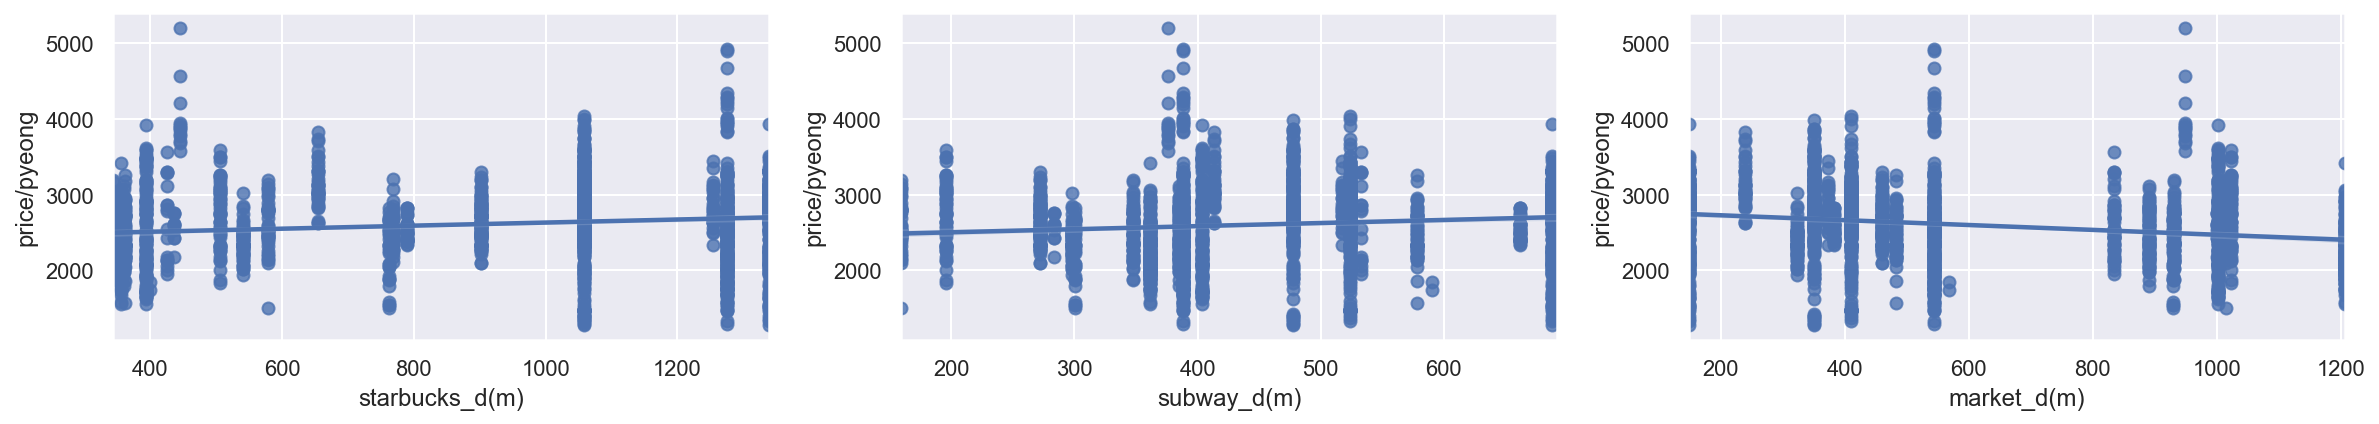

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(20,3)})
fig, ax = plt.subplots(ncols=3, nrows=1)
sns.regplot(y='price/pyeong', x='starbucks_d(m)', data=final_df, ax=ax[0], )
sns.regplot(y='price/pyeong',x='subway_d(m)', data=final_df, ax=ax[1])
sns.regplot(y='price/pyeong',x='market_d(m)', data=final_df, ax=ax[2]);

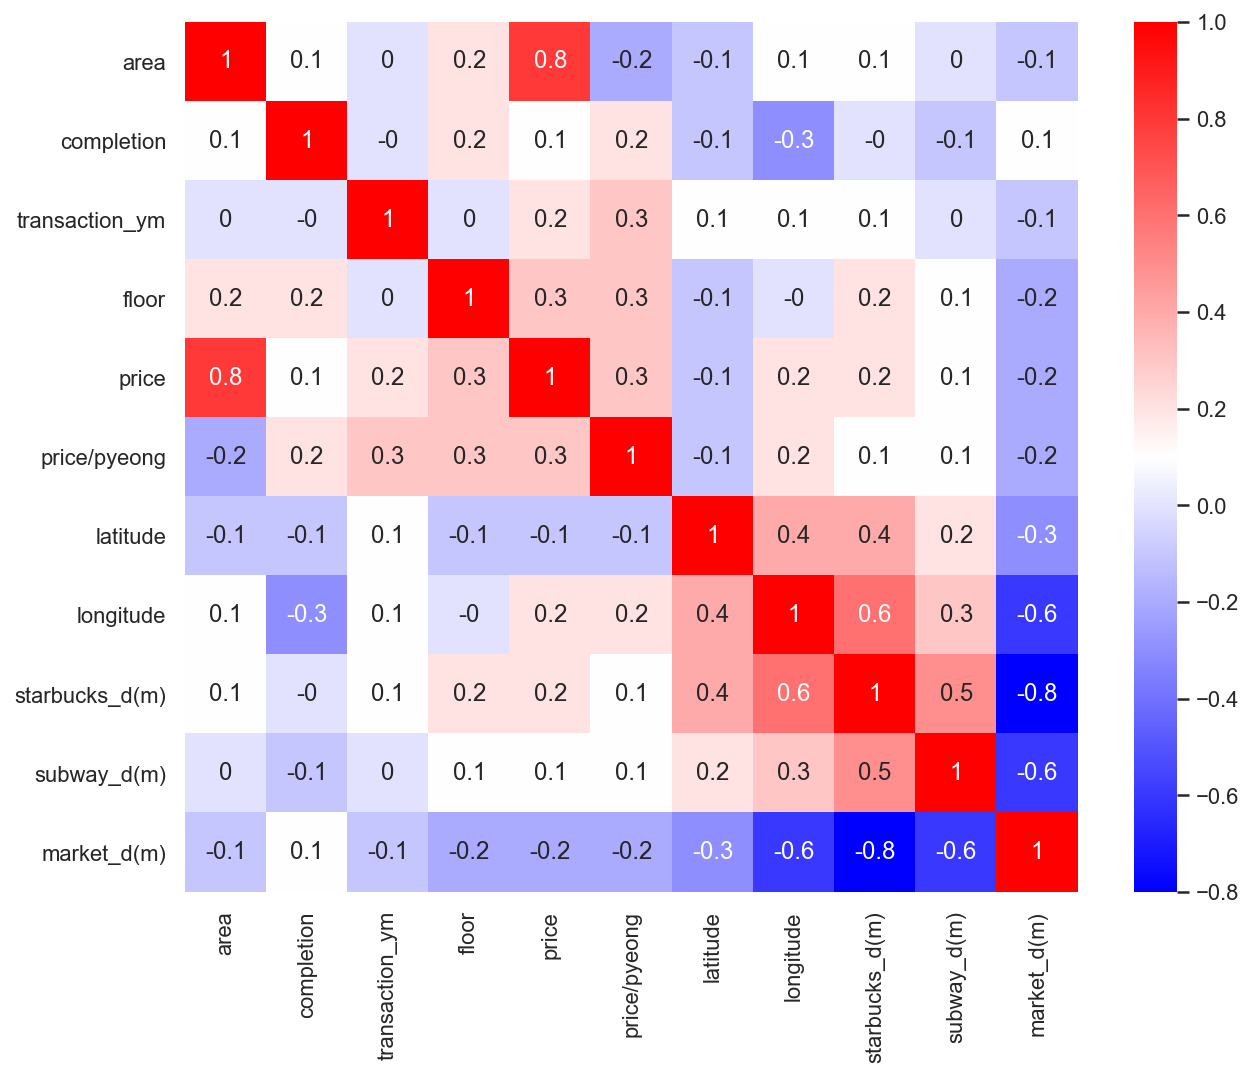

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

corr_mat = final_df.corr().round(1)
sns.set(rc={"figure.figsize":(10,8)})
sns.heatmap(data=corr_mat, annot=True, cmap="bwr")
plt.show()